In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sb

In [2]:
genome_scores = pd.read_csv("data/ml-25m/genome-scores.csv",engine="python")
genome_tags = pd.read_csv("data/ml-25m/genome-tags.csv",engine="python")
links = pd.read_csv("data/ml-25m/links.csv",engine="python")
movies = pd.read_csv("data/ml-25m/movies.csv",engine="python")
ratings = pd.read_csv("data/ml-25m/ratings.csv",engine="python")
tags = pd.read_csv("data/ml-25m/tags.csv",engine="python")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
len(movies['movieId'].unique())

62423

In [6]:
ratings.shape

(25000095, 4)

In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [9]:
len(ratings['userId'].unique())

162541

In [10]:
tags.shape

(1093360, 4)

In [11]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


data cleaning

In [12]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [13]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [14]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [15]:
tags = tags.dropna()

In [16]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [17]:
tags.shape

(1093344, 4)

In [18]:
len(tags['tag'].unique())

73050

In [19]:
tags_unique = tags['tag'].unique().tolist()
tags_unique

['classic',
 'sci-fi',
 'dark comedy',
 'great dialogue',
 "so bad it's good",
 'unreliable narrators',
 'tense',
 'artificial intelligence',
 'philosophical',
 'cliche',
 'musical',
 'horror',
 'unpredictable',
 'Oscar (Best Supporting Actress)',
 'adventure',
 'anime',
 'ecology',
 'fantasy',
 'Hayao Miyazaki',
 'Miyazaki',
 'post-apocalyptic',
 'bah',
 'Clint Eastwood',
 'music',
 'art',
 'contemporary art',
 'documentary',
 'aliens',
 'amazing photography',
 'Director: James Cameron',
 'first contact',
 'James Cameron',
 'Michael Biehn',
 'android(s)/cyborg(s)',
 'apocalypse',
 'Arnold Schwarzenegger',
 'franchise',
 'terminator',
 'time travel',
 'science fiction',
 'inferior sequel',
 'setting:London (UK) (future)',
 'unoriginal',
 'bad science',
 'good science',
 'Hans Zimmer',
 'philosophical issues',
 'space',
 'space travel',
 'time-travel',
 'visually appealing',
 'bittersweet',
 'boring',
 'conversation',
 'dialogue driven',
 'loneliness',
 'love story',
 'philosophy',
 'qu

analyzing data

In [20]:
from collections import Counter

def count_genres(movies_df):
    genre_counts = Counter()
    movies_df['genres'].str.split('|').apply(genre_counts.update)
    return genre_counts.most_common()

In [21]:
genre_counts = count_genres(movies)
genre_counts

[('Drama', 25606),
 ('Comedy', 16870),
 ('Thriller', 8654),
 ('Romance', 7719),
 ('Action', 7348),
 ('Horror', 5989),
 ('Documentary', 5605),
 ('Crime', 5319),
 ('(no genres listed)', 5062),
 ('Adventure', 4145),
 ('Sci-Fi', 3595),
 ('Children', 2935),
 ('Animation', 2929),
 ('Mystery', 2925),
 ('Fantasy', 2731),
 ('War', 1874),
 ('Western', 1399),
 ('Musical', 1054),
 ('Film-Noir', 353),
 ('IMAX', 195)]

In [22]:
comedy_movies = movies['genres'].str.contains('Comedy')
comedy_movies.shape

(62423,)

In [23]:
movies[comedy_movies]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
62402,209119,Up to the World (2014),Comedy|Drama
62411,209141,And They Lived Happily Ever After (1976),Comedy
62416,209153,Happy Flight (2008),Comedy|Drama
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance


In [24]:
nonlisted_movies = movies['genres'].str.contains('(no genres listed)')
nonlisted_movies.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_27156\372989128.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  nonlisted_movies = movies['genres'].str.contains('(no genres listed)')


(62423,)

In [25]:
movies[nonlisted_movies]

,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768,Glitterbug (1994),(no genres listed)
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061,Trails (Veredas) (1978),(no genres listed)
17404,91246,Milky Way (Tejút) (2007),(no genres listed)
...,...,...,...
62400,209101,Hua yang de nian hua (2001),(no genres listed)
62401,209103,Tsar Ivan the Terrible (1991),(no genres listed)
62407,209133,The Riot and the Dance (2018),(no genres listed)
62415,209151,Mao Zedong 1949 (2019),(no genres listed)


rating

In [26]:
del ratings['timestamp']

In [27]:
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [28]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
movies_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

In [30]:
movies_ratings

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0


In [31]:
rated_movies_rank = movies_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)
rated_movies_rank

title
Full of Grace (2015)            5.0
Geordie (1955)                  5.0
Garfield In Paradise (1986)     5.0
Lost Woods (2012)               5.0
Garfield in the Rough (1984)    5.0
                               ... 
Caro Gorbaciov (1988)           0.5
Don't Let Go (2019)             0.5
Ice Queen (2005)                0.5
The Lodge (2019)                0.5
Robot Wars (1993)               0.5
Name: rating, Length: 58958, dtype: float64

In [33]:
most_rated_rank = movies_ratings.groupby('title').size().sort_values(ascending=False)
most_rated_rank

title
Forrest Gump (1994)                                        81491
Shawshank Redemption, The (1994)                           81482
Pulp Fiction (1994)                                        79672
Silence of the Lambs, The (1991)                           74127
Matrix, The (1999)                                         72674
                                                           ...  
Kojot (2017)                                                   1
Kochavva Paulo Ayyappa Coelho (2016)                           1
Knuckleface Jones (1999)                                       1
The Lodge (2019)                                               1
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)        1
Length: 58958, dtype: int64

In [34]:
most_rated_rank.shape

(58958,)

In [35]:
most_rated_rank.describe()

count    58958.000000
mean       424.032277
std       2479.744597
min          1.000000
25%          2.000000
50%          6.000000
75%         36.750000
max      81491.000000
dtype: float64

In [36]:
accepted_movies = most_rated_rank[most_rated_rank > 10].index.tolist()

In [37]:
accepted_movies

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 "Schindler's List (1993)",
 'Braveheart (1995)',
 'Fight Club (1999)',
 'Terminator 2: Judgment Day (1991)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Toy Story (1995)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Usual Suspects, The (1995)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'American Beauty (1999)',
 'Godfather, The (1972)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Seven (a.k.a. Se7en) (1995)',
 'Fugitive, The (1993)',
 'Back to the Future (1985)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Apollo 13 (1995)',
 'Fargo (1996)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (

In [38]:
accepted_movies_ratings = movies_ratings[movies_ratings['title'].isin(accepted_movies)]
accepted_movies_ratings

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
24999961,208737,Midway (2019),Action|Drama|War,132358,2.0
24999962,208737,Midway (2019),Action|Drama|War,141420,3.0
24999963,208737,Midway (2019),Action|Drama|War,143568,3.5
24999964,208737,Midway (2019),Action|Drama|War,154088,4.0


In [39]:
accepted_movies_ratings_rank = accepted_movies_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)

In [40]:
accepted_movies_ratings_rank

title
Planet Earth II (2016)                 4.483096
Planet Earth (2006)                    4.464797
Shawshank Redemption, The (1994)       4.413576
Band of Brothers (2001)                4.398599
Pollyanna (2003)                       4.384615
                                         ...   
Saving Christmas (2014)                0.921053
Justin Bieber's Believe (2013)         0.904762
SuperBabies: Baby Geniuses 2 (2004)    0.899038
Hip Hop Witch, Da (2000)               0.854839
Kidnapping, Caucasian Style (2014)     0.678571
Name: rating, Length: 23344, dtype: float64

In [41]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [42]:
del tags['timestamp']

In [43]:
tags

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
...,...,...,...
1093355,162521,66934,Neil Patrick Harris
1093356,162521,103341,cornetto trilogy
1093357,162534,189169,comedy
1093358,162534,189169,disabled


In [44]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [45]:
movies_non_genres = movies[['movieId','title']]

In [46]:
movies_non_genres

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
62418,209157,We (2018)
62419,209159,Window of the Soul (2001)
62420,209163,Bad Poems (2018)
62421,209169,A Girl Thing (2001)


In [47]:
movies_tags = pd.merge(movies_non_genres,tags, on='movieId', how='inner')
movies_tags

,movieId,title,userId,tag
0,1,Toy Story (1995),791,Owned
1,1,Toy Story (1995),1048,imdb top 250
2,1,Toy Story (1995),1361,Pixar
3,1,Toy Story (1995),3164,Pixar
4,1,Toy Story (1995),3164,time travel
...,...,...,...,...
1093339,209063,The Prep School Negro (2012),96399,Philadelphia
1093340,209063,The Prep School Negro (2012),96399,private school
1093341,209063,The Prep School Negro (2012),96399,quaker
1093342,209063,The Prep School Negro (2012),96399,racism


In [48]:
tagged = movies_tags.groupby('title').size().sort_values(ascending=False)
tagged

title
Star Wars: Episode IV - A New Hope (1977)    6180
Pulp Fiction (1994)                          4767
Inception (2010)                             4767
Interstellar (2014)                          3616
Fight Club (1999)                            3612
                                             ... 
Catacombs (1964)                                1
Sergio (2009)                                   1
Cat's Play (1974)                               1
Serpent (2017)                                  1
줄탁동시 (2012)                                     1
Length: 45208, dtype: int64

In [49]:
fun_tags = movies_tags['tag'].str.contains('funny')
fun_movies = movies_tags[fun_tags]

In [50]:
fun_movies

,movieId,title,userId,tag
7,1,Toy Story (1995),3448,funny
52,1,Toy Story (1995),7570,funny
82,1,Toy Story (1995),17069,funny
87,1,Toy Story (1995),19663,funny
94,1,Toy Story (1995),20346,funny
...,...,...,...,...
1091841,204302,Ek Ladki Ko Dekha Toh Aisa Laga (2019),118674,funny
1092379,204878,Dolemite Is My Name (2019),3842,funny
1092440,205054,Hustlers (2019),94239,funny
1092533,205287,Bacurau (2019),45004,funny


In [51]:
most_fun_movies = fun_movies.groupby('title').size().sort_values(ascending=False)
most_fun_movies

title
Intouchables (2011)                       65
Grand Budapest Hotel, The (2014)          62
Scott Pilgrim vs. the World (2010)        51
Hangover, The (2009)                      50
Zombieland (2009)                         50
                                          ..
Party, The (1968)                          1
Ek Ladki Ko Dekha Toh Aisa Laga (2019)     1
Patchwork (2015)                           1
Eddie Murphy Raw (1987)                    1
(500) Days of Summer (2009)                1
Length: 1417, dtype: int64

In [52]:
terminatordf_tag = movies_tags['title'].str.contains('Terminator: Dark Fate')

In [53]:
movies_tags[terminatordf_tag]

,movieId,title,userId,tag
1093156,207830,Terminator: Dark Fate (2019),57837,action
1093157,207830,Terminator: Dark Fate (2019),57837,cyborg
1093158,207830,Terminator: Dark Fate (2019),57837,female protagonist
1093159,207830,Terminator: Dark Fate (2019),57837,mexico
1093160,207830,Terminator: Dark Fate (2019),57837,sci-fi
1093161,207830,Terminator: Dark Fate (2019),57837,terminator
1093162,207830,Terminator: Dark Fate (2019),72360,prospect preferred
1093163,207830,Terminator: Dark Fate (2019),94239,altenrate future
1093164,207830,Terminator: Dark Fate (2019),94239,Arnold Schwarzenegger
1093165,207830,Terminator: Dark Fate (2019),94239,commentary on US border control policy


In [54]:
plt_ratings = ratings['userId'].value_counts()

In [55]:
plt_ratings

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
12094        20
119539       20
156759       20
12084        20
36207        20
Name: count, Length: 162541, dtype: int64

<Axes: title={'center': 'User Frequency ratings'}, xlabel='number of user', ylabel='number of ratings'>

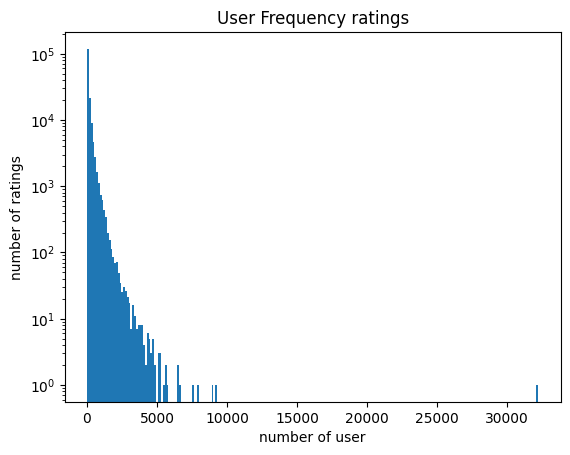

In [56]:
plt_ratings.plot(kind='hist',bins = 250,log=True,title = 'User Frequency ratings',xlabel = 'number of user',ylabel = 'number of ratings')

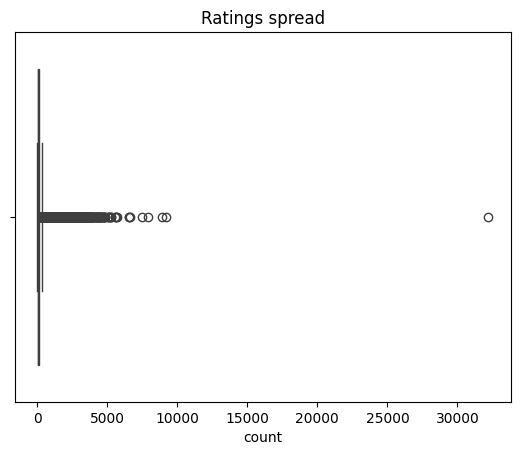

In [57]:
sb.boxplot(x=plt_ratings)
plt.title('Ratings spread')
plt.show()

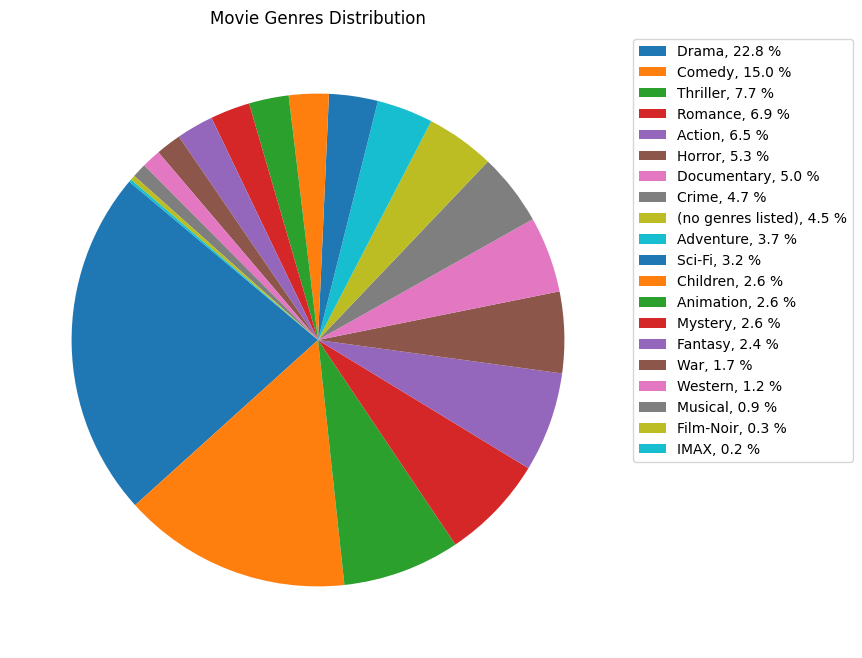

In [58]:
genre_label, genre_number = zip(*genre_counts)
genre_percent = np.array(genre_number) / np.sum(genre_number) * 100
plt.figure(figsize=(10, 8))
plt.title('Movie Genres Distribution')
plt.pie(genre_number,startangle=140)
plt.legend(labels=['%s, %1.1f %%' % (l, s) for l, s in zip(genre_label,genre_percent)],loc='upper left',bbox_to_anchor=(1, 0, 0.5, 1))

In [59]:
movies_rating_distribution = movies_ratings.groupby('rating').size().sort_values(ascending=False)
movies_rating_distribution

rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
dtype: int64

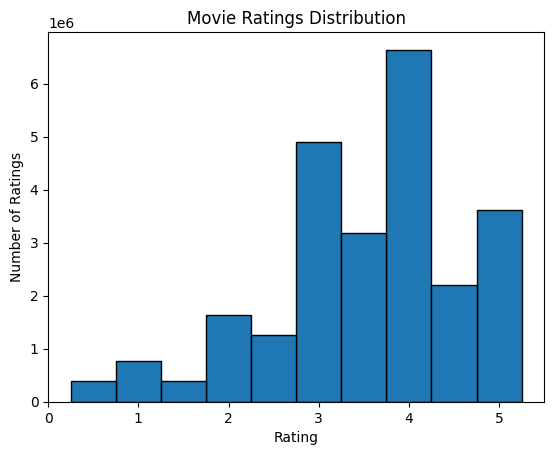

In [60]:
plt.bar(movies_rating_distribution.index, movies_rating_distribution.values,edgecolor='black',width=0.5)
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

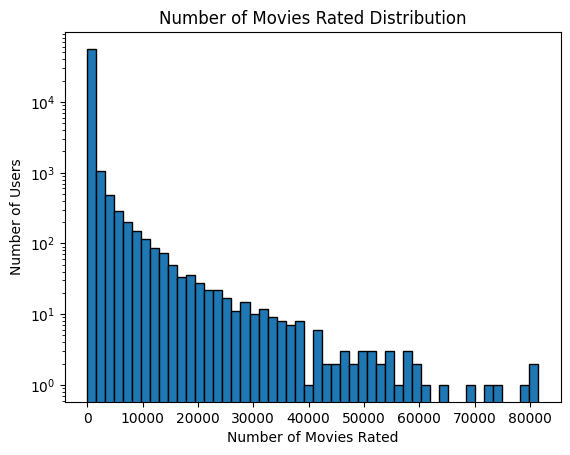

In [61]:
plt.hist(most_rated_rank.values, bins=50, edgecolor='black',log=True)
plt.title('Number of Movies Rated Distribution')
plt.xlabel('Number of Movies Rated')
plt.ylabel('Number of Users')
plt.show()

In [62]:
rating_join = rated_movies_rank.to_frame(name='ratings').join(most_rated_rank.to_frame(name='number of rating'), how='outer')
rating_join

,ratings,number of rating
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3
...,...,...
…And the Fifth Horseman Is Fear (1965),3.250000,2
キサラギ (2007),3.250000,2
チェブラーシカ (2010),3.166667,9


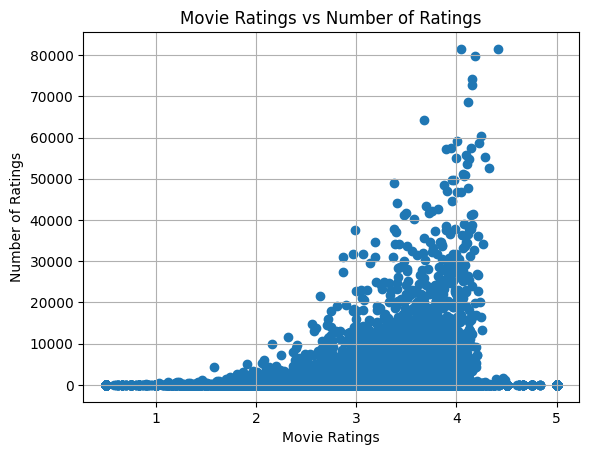

In [63]:
plt.scatter(rating_join['ratings'], rating_join['number of rating'])
plt.title('Movie Ratings vs Number of Ratings')
plt.xlabel('Movie Ratings')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

In [64]:
movies_ratings['year'] = movies_ratings['title'].str.extract(r'\((\d{4})\)')[0]

In [65]:
movies_ratings_w_year = movies_ratings.dropna(subset=['year'])

In [66]:
movies_ratings_w_year['year'] = pd.to_numeric(movies_ratings_w_year['year'], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27156\1940130547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ratings_w_year['year'] = pd.to_numeric(movies_ratings_w_year['year'], errors='coerce')


In [67]:
movies_ratings_w_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24988355 entries, 0 to 25000094
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   title    object 
 2   genres   object 
 3   userId   int64  
 4   rating   float64
 5   year     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


In [68]:
unique_movies = movies_ratings_w_year['title'].unique()
unique_movies.shape

(58586,)

In [69]:
unique_movies_df = pd.DataFrame(unique_movies, columns=['title'])
unique_movies_df['year'] = unique_movies_df['title'].str.extract(r'\((\d{4})\)')[0].astype(int)

In [70]:
movies_year = unique_movies_df['year'].value_counts().sort_index(ascending=False)
movies_year

year
2019     988
2018    2012
2017    2322
2016    2414
2015    2442
        ... 
1887       1
1883       1
1880       1
1878       1
1874       1
Name: count, Length: 135, dtype: int64

In [71]:
movies_year.describe()

count     135.000000
mean      433.970370
std       570.506922
min         1.000000
25%        32.000000
50%       241.000000
75%       487.000000
max      2442.000000
Name: count, dtype: float64

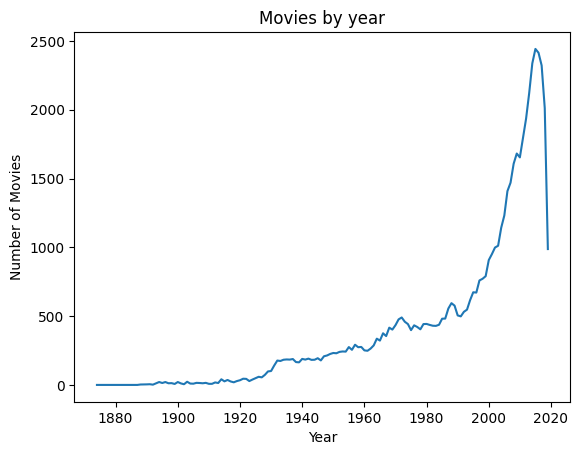

In [72]:
plt.plot(movies_year.index, movies_year.values)
plt.title('Movies by year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [73]:
movies_avg = movies_ratings_w_year.groupby(['title','year'])['rating'].mean().reset_index()
movies_avg

,title,year,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1983,3.000000
1,"""Great Performances"" Cats (1998)",1998,2.896648
2,#1 Cheerleader Camp (2010),2010,2.111111
3,#Captured (2017),2017,3.750000
4,#Female Pleasure (2018),2018,3.666667
...,...,...,...
58581,…And the Fifth Horseman Is Fear (1965),1965,3.250000
58582,キサラギ (2007),2007,3.250000
58583,チェブラーシカ (2010),2010,3.166667
58584,貞子3D (2012),2012,2.375000


In [74]:
movies_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58586 entries, 0 to 58585
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   58586 non-null  object 
 1   year    58586 non-null  int64  
 2   rating  58586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [75]:
movies_year_avg = movies_avg.groupby('year').agg(average_rating=('rating', 'mean'), movies_count=('title', 'count')).reset_index()
movies_year_avg

,year,average_rating,movies_count
0,1874,3.027778,1
1,1878,2.909091,1
2,1880,2.666667,1
3,1883,2.636364,1
4,1887,1.750000,1
...,...,...,...
130,2015,3.121467,2442
131,2016,3.134814,2414
132,2017,3.101902,2322
133,2018,3.013129,2012


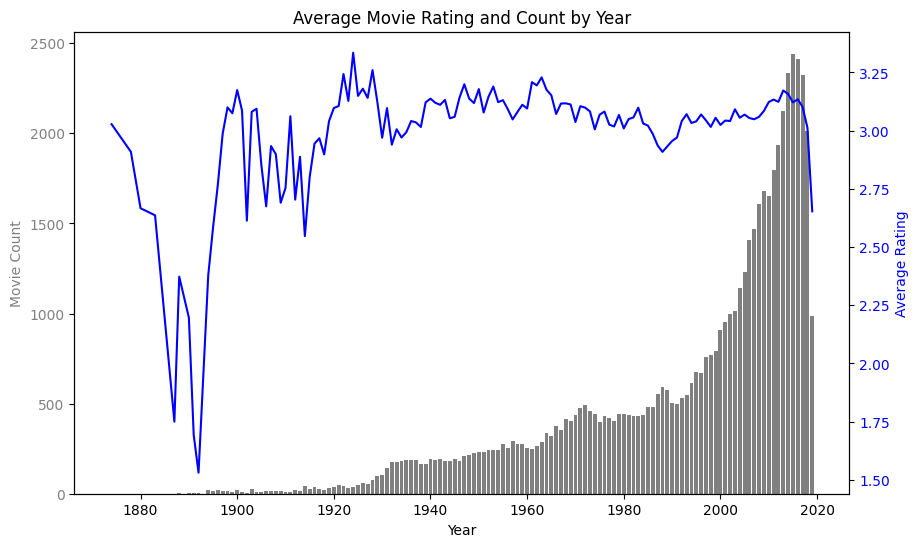

In [76]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(movies_year_avg['year'], movies_year_avg['movies_count'], color='gray', label='Movie Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Movie Count', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()
ax2.plot(movies_year_avg['year'], movies_year_avg['average_rating'], color='blue', label='Average Rating')
ax2.set_ylabel('Average Rating', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Movie Rating and Count by Year')
plt.show()

In [77]:
user_avg_ratings = movies_ratings_w_year.groupby('userId')['rating'].mean().reset_index()
user_avg_ratings

,userId,rating
0,1,3.814286
1,2,3.630435
2,3,3.697710
3,4,3.378099
4,5,3.752475
...,...,...
162536,162537,4.039604
162537,162538,3.415584
162538,162539,4.510638
162539,162540,3.829545


In [78]:
user_ratings = pd.merge(user_avg_ratings, plt_ratings, on='userId', how='inner')
user_ratings

,userId,rating,count
0,1,3.814286,70
1,2,3.630435,184
2,3,3.697710,656
3,4,3.378099,242
4,5,3.752475,101
...,...,...,...
162536,162537,4.039604,101
162537,162538,3.415584,154
162538,162539,4.510638,47
162539,162540,3.829545,88


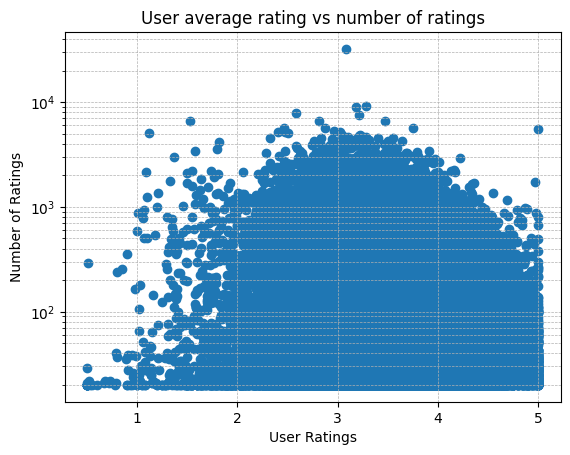

In [79]:
plt.scatter(user_ratings['rating'], user_ratings['count'])
plt.title('User average rating vs number of ratings')
plt.yscale('log')
plt.xlabel('User Ratings')
plt.ylabel('Number of Ratings')
plt.grid(True,which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27156\566650383.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = user_ratings.groupby(['count_bin', 'rating_bin']).size().unstack()


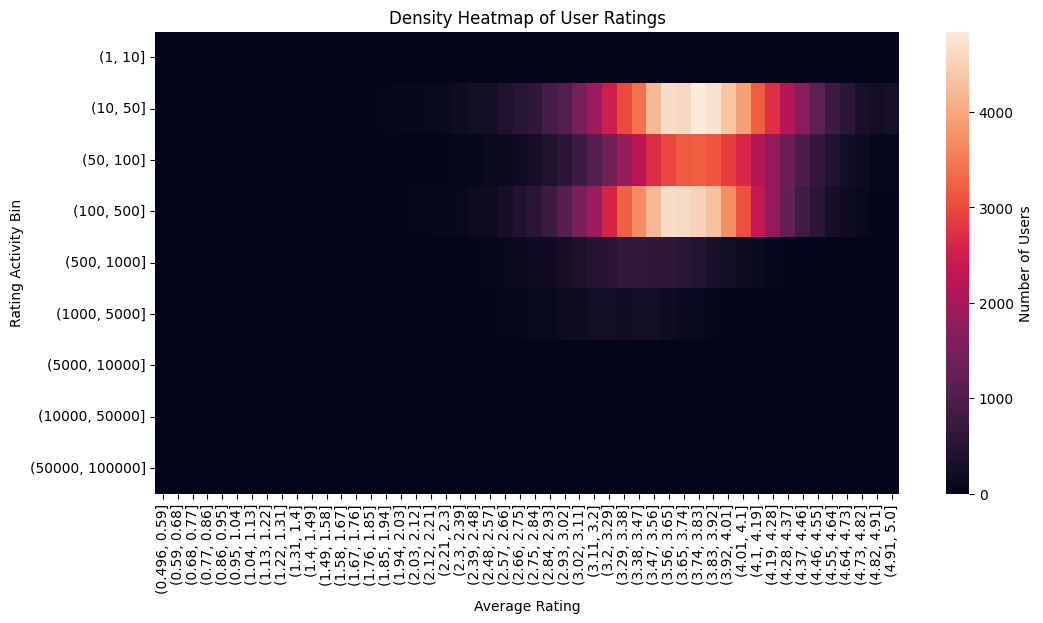

In [80]:
user_ratings_binned = user_ratings.copy()
user_ratings['count_bin'] = pd.cut(user_ratings['count'], bins=[1, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
user_ratings['rating_bin'] = pd.cut(user_ratings['rating'], bins=50)

heatmap_data = user_ratings.groupby(['count_bin', 'rating_bin']).size().unstack()

plt.figure(figsize=(12, 6))
sb.heatmap(heatmap_data, cbar_kws={'label': 'Number of Users'})
plt.title('Density Heatmap of User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Rating Activity Bin')
plt.show()

Recommendation System

In [81]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [82]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [83]:
movies['cleaned_title'] = movies['title'].apply(clean_text)

In [84]:
tfidf = vectorizer.fit_transform(movies['cleaned_title'])

In [85]:
def search_movies(title):
    title = clean_text(title)
    user_title = vectorizer.transform([title])
    similarity = cosine_similarity(user_title, tfidf).flatten()
    index = np.argsort(similarity)[-10:][::-1]
    result = movies.iloc[index]
    return result

In [86]:
search_movies('Terminator')

,movieId,title,genres,cleaned_title
1207,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,Terminator The 1984
13334,68791,Terminator Salvation (2009),Action|Adventure|Sci-Fi|Thriller,Terminator Salvation 2009
31990,139909,Russian Terminator (1989),Action,Russian Terminator 1989
24155,120799,Terminator Genisys (2015),Action|Adventure|Sci-Fi|Thriller,Terminator Genisys 2015
581,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,Terminator 2 Judgment Day 1991
62088,207830,Terminator: Dark Fate (2019),Action|Sci-Fi,Terminator Dark Fate 2019
6414,6537,Terminator 3: Rise of the Machines (2003),Action|Adventure|Sci-Fi,Terminator 3 Rise of the Machines 2003
47702,175137,The Making of 'The Terminator': A Retrospectiv...,Documentary,The Making of The Terminator A Retrospective 1992
48792,177415,The Making of 'Terminator 2: Judgment Day' (1991),Documentary,The Making of Terminator 2 Judgment Day 1991
19729,102425,Lady Terminator (Pembalasan ratu pantai selata...,Action|Adventure|Horror|Sci-Fi|Thriller,Lady Terminator Pembalasan ratu pantai selatan...


In [87]:
def find_similar_movies(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

In [88]:
find_similar_movies(5)

,score,title,genres
4,141.480372,Father of the Bride Part II (1995),Comedy
6819,36.894666,Father of the Bride (1991),Comedy
2,22.870430,Grumpier Old Men (1995),Comedy|Romance
6,14.962567,Sabrina (1995),Comedy|Romance
772,14.324154,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi
313,13.365885,"Santa Clause, The (1994)",Comedy|Drama|Fantasy
489,12.955658,Executive Decision (1996),Action|Adventure|Thriller
166,11.828687,First Knight (1995),Action|Drama|Romance
93,11.280827,Broken Arrow (1996),Action|Adventure|Thriller
274,11.167013,Miracle on 34th Street (1994),Drama


pickle

In [100]:
class RecommendationSystem:
    def __init__(self, movies_df, ratings_df,vectorizer, tfidf):
        self.vectorizer = vectorizer
        self.tfidf = tfidf
        self.movies = movies_df
        self.ratings = ratings_df

    def clean_text(self,text):
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return text

    def search_movies(self,title):
        title = self.clean_text(title)
        user_title = self.vectorizer.transform([title])
        similarity = cosine_similarity(user_title, self.tfidf).flatten()
        index = np.argsort(similarity)[-10:][::-1]
        result = self.movies.iloc[index]
        return result
    
    def find_similar_movies(self,movie_id):
        similar_users = self.ratings[(self.ratings["movieId"] == movie_id) & (self.ratings["rating"] > 4)]["userId"].unique()
        similar_user_recs = self.ratings[(self.ratings["userId"].isin(similar_users)) & (self.ratings["rating"] > 4)]["movieId"]
        similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

        similar_user_recs = similar_user_recs[similar_user_recs > .10]
        all_users = self.ratings[(self.ratings["movieId"].isin(similar_user_recs.index)) & (self.ratings["rating"] > 4)]
        all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
        rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
        rec_percentages.columns = ["similar", "all"]
        
        rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
        rec_percentages = rec_percentages.sort_values("score", ascending=False)
        return rec_percentages.head(10).merge(self.movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]
        
        

In [101]:
recommender = RecommendationSystem(movies, ratings,vectorizer, tfidf)
recommender.search_movies('Terminator')

,movieId,title,genres,cleaned_title
1207,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,Terminator The 1984
13334,68791,Terminator Salvation (2009),Action|Adventure|Sci-Fi|Thriller,Terminator Salvation 2009
31990,139909,Russian Terminator (1989),Action,Russian Terminator 1989
24155,120799,Terminator Genisys (2015),Action|Adventure|Sci-Fi|Thriller,Terminator Genisys 2015
581,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,Terminator 2 Judgment Day 1991
62088,207830,Terminator: Dark Fate (2019),Action|Sci-Fi,Terminator Dark Fate 2019
6414,6537,Terminator 3: Rise of the Machines (2003),Action|Adventure|Sci-Fi,Terminator 3 Rise of the Machines 2003
47702,175137,The Making of 'The Terminator': A Retrospectiv...,Documentary,The Making of The Terminator A Retrospective 1992
48792,177415,The Making of 'Terminator 2: Judgment Day' (1991),Documentary,The Making of Terminator 2 Judgment Day 1991
19729,102425,Lady Terminator (Pembalasan ratu pantai selata...,Action|Adventure|Horror|Sci-Fi|Thriller,Lady Terminator Pembalasan ratu pantai selatan...


In [102]:
recommender.find_similar_movies(1240)

,score,title,genres
1207,12.516822,"Terminator, The (1984)",Action|Sci-Fi|Thriller
2893,7.188753,RoboCop (1987),Action|Crime|Drama|Sci-Fi|Thriller
3429,7.152470,Predator (1987),Action|Sci-Fi|Thriller
2824,6.675848,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
1242,6.285654,Highlander (1986),Action|Adventure|Fantasy
1911,5.709371,Lethal Weapon (1987),Action|Comedy|Crime|Drama
2438,5.310805,Planet of the Apes (1968),Action|Drama|Sci-Fi
1170,5.271031,Aliens (1986),Action|Adventure|Horror|Sci-Fi
1338,5.218941,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller
2197,5.154179,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller


In [106]:
import pickle

with open("recommender.pkl", "wb") as f:
    pickle.dump(recommender, f)

In [107]:
with open("recommender.pkl", 'rb') as f:
    pickle_recommender = pickle.load(f)

In [108]:
pickle_recommender.search_movies('Terminator')

,movieId,title,genres,cleaned_title
1207,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,Terminator The 1984
13334,68791,Terminator Salvation (2009),Action|Adventure|Sci-Fi|Thriller,Terminator Salvation 2009
31990,139909,Russian Terminator (1989),Action,Russian Terminator 1989
24155,120799,Terminator Genisys (2015),Action|Adventure|Sci-Fi|Thriller,Terminator Genisys 2015
581,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,Terminator 2 Judgment Day 1991
62088,207830,Terminator: Dark Fate (2019),Action|Sci-Fi,Terminator Dark Fate 2019
6414,6537,Terminator 3: Rise of the Machines (2003),Action|Adventure|Sci-Fi,Terminator 3 Rise of the Machines 2003
47702,175137,The Making of 'The Terminator': A Retrospectiv...,Documentary,The Making of The Terminator A Retrospective 1992
48792,177415,The Making of 'Terminator 2: Judgment Day' (1991),Documentary,The Making of Terminator 2 Judgment Day 1991
19729,102425,Lady Terminator (Pembalasan ratu pantai selata...,Action|Adventure|Horror|Sci-Fi|Thriller,Lady Terminator Pembalasan ratu pantai selatan...


In [109]:
pickle_recommender.find_similar_movies(1240)

,score,title,genres
1207,12.516822,"Terminator, The (1984)",Action|Sci-Fi|Thriller
2893,7.188753,RoboCop (1987),Action|Crime|Drama|Sci-Fi|Thriller
3429,7.152470,Predator (1987),Action|Sci-Fi|Thriller
2824,6.675848,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
1242,6.285654,Highlander (1986),Action|Adventure|Fantasy
1911,5.709371,Lethal Weapon (1987),Action|Comedy|Crime|Drama
2438,5.310805,Planet of the Apes (1968),Action|Drama|Sci-Fi
1170,5.271031,Aliens (1986),Action|Adventure|Horror|Sci-Fi
1338,5.218941,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller
2197,5.154179,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller
